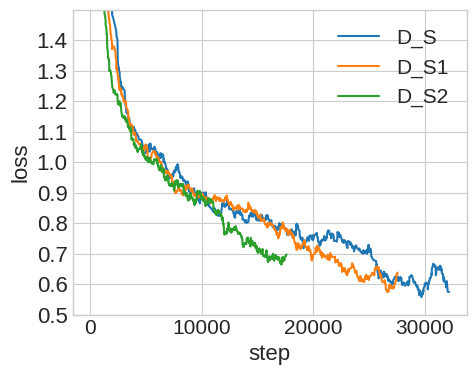

In [99]:
# 读取tensorboard导出的数据，绘制平滑曲线
import os
import numpy as np
import matplotlib.pyplot as plt

def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
    return smoothed


def read_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines[1:]:
            line = line.strip().split(',')
            x.append(int(line[1]))
            y.append(float(line[2]))
    return x, y

def main():
    plt.figure(figsize=(5, 4))
    # names = ['A', 'B', 'C', 'D']
    # for name in names:
    name = 'D'
    sub_ = [name+'_S', name+'_S1', name+'_S2']
    #sub_ = [name+'_S4_O',name+'_S4']
    for sub in sub_:
        if name == 'B' or name == 'D':
            file_path = './loss_curve/run-voxel_rcnn_car_'+sub+'_tensorboard-tag-train_loss.csv'
        else:
            file_path = './loss_curve/run-voxel_rcnn_car_'+sub+'_tensorboard-tag-train_loss.csv'
        x, y = read_file(file_path)
        y = smooth(y, 0.97)
        plt.xlabel('step', fontsize=16)
        plt.ylabel('loss', fontsize=16)
        plt.tight_layout()
        plt.plot(x, y, label=sub)

    # plt.xlim(0, 38000, 1000)
    plt.ylim(0.5, 1.5)
    # plt.xticks(np.arange(35000, 80000, 8000), fontsize=16)
    plt.yticks(np.arange(0.5, 1.5, 0.1), fontsize=16)
    plt.legend()
    plt.savefig('./loss_fig/'+name+'_vr_loss.pdf')
    plt.show()


if __name__ == '__main__':
    main()